<a href="https://colab.research.google.com/github/MadhusudhanRangaswamaiah/EVA-Session-4/blob/master/3rd_DNN_ntw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third Network

In the previous network we tried using some of the tools like Batch Normalization and Learning Rate. 

It was seen that **Batch Normalization** will -

* Speed-up the learning of the network (on training data-set) i.e, it can train the network with lesser number of epoch / iterations, but takes more time for each epoch as it increases computational load by adding parameters to the network.

* This benefit of Batch Normalization can be further enhanced by increasing the learning rate.

* add Regularization to the network.

All these benefits are apparent in large scale DNNs than smaller shallower networks.

We could achieve 99.18% Validation Accuracy with 20,090 parameters.

But our target is 99.4% of Validation Accuracy with less than 15K parameters.

We have also increased **Batch Size** to 128 in our 2nd Code which will serve two purposes - 

     1. Speed-up the computation
    2. Add some regularization i.e, as batch size increases quality of the network degrades and thus the network can generalize well.

**=====================================================**

In this network, let's introduce **Dropout**. 

According to Wikipedia — 
*The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.*

**Why do we need Dropout?**
-------------------------------------


      To prevent overfitting.
**============================================================**
 
 - Dropout is an approach to regularization in neural networks.
 
 - By using Dropout more number of epoch are required.
 
 - Dropout need not be used in conjunction with Batch Normalization as the later one will also add Regularization.

**============================================================**

- Batch Normalization is not used in this code.

- Dropout is used to adress the overfitting problem.

      If the Validation accuracy is pretty much lesser than Training accuracy then it is a clear case of overfitting. ==> Address this problem by adding Dropouts.

      Adding too many Dropouts will lead to underfitting of the network.

      -  This can be observed by seeing the training accuracy not improving further with increase in the number of epoch.


 


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
                      #The Python Package Index (PyPI) is a repository of 
                      #software for the Python programming language.
    
                      #pip installs Keras. Keras is an open network open-source 
                      #neural-network library written in Python. 
import keras
                      #Python code in this module gains access to the code 
                      #in Keras module by the process of importing it using 
                      #the import statement.
      
                      #Keras is an open source neural-network library written 
                      #in Python.
                      #Keras-Modular: Building models is as simple as stacking 
                      #layers and connecting graphs.

In [0]:
import numpy as np    # import numpy package as np (alias)
from keras.models import Sequential
                                        #The core data structure of Keras is 
                                        #a model (a way to organize layers)
                                        #The Simplest type of model is 
                                        #Sequential Model (a linear stack of 
                                        #layers)
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization 
from keras.utils import np_utils

from keras.datasets import mnist        #MNIST database of handwritten digits
                                        #Dataset of 60,000 28x28 grayscale 
                                        #images of the 10 digits, along with a 
                                        #test set of 10,000 images.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Returns 2 Tuples - 
                                                           
#1. x_train, x_test: uint8 array of grayscale image data with shape 
#   (num_samples, 28, 28).
#2. y_train, y_test: uint8 array of digit labels (integers in range 0-9) with 
#   shape (num_samples,).

(60000, 28, 28)


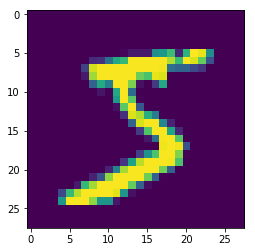

In [54]:
print (X_train.shape)#Prints the dimension of the array X_train-
                     # Dataset of 60,000 28x28 grayscale images of the 10 digits
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])#Displays the first image in X_train Dataset

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# (60000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# (10000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)

In [0]:
X_train = X_train.astype('float32')  #Convert X_train data from uint8 (0to255)
                                     #to float32 
X_test = X_test.astype('float32')    #Convert X_test data from uint8 (0to255) 
                                     #to float32
X_train /= 255                       #Normalize X_train data
X_test /= 255                        #Normalize X_test data

In [57]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [59]:
Y_train[:10]
#uint8 array of labels (integers in range 0-9) with shape (num_samples,)==> 
#First 10 Data

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))

#(# of filters, Kernel Size, activation='relu',
#input shape must be specified for first Layer-->28x28 (1 Channel))
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(28x28x(1Channel)|(3x3x(1Channel)x(32 no. of filters)|(26x26x(32 no. of channels))o/p

model.add(Dropout(0.25))

##
#model.add(BatchNormalization())
##

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 13x13x(32 no. of channels)

model.add(Convolution2D(32, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(13x213x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(11x11x(32 no. of channels))o/p

##
#model.add(BatchNormalization())
##

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 5x5x(32 no. of channels)

model.add(Convolution2D(32, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(5x5x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(3x3x(32 no. of channels))o/p

##
#model.add(BatchNormalization())
##

model.add(Dropout(0.25))

model.add(Convolution2D(10, 3))
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(3x3x(1Channel)|(3x3x(32Channel)x(10 no. of filters)|(1x1x(10 no. of channels))o/p

#model.add(Dropout(0.25))


model.add(Flatten())
# now: model.output_shape == (None, 10)
# Flattening means to remove all of the dimensions except for one.

model.add(Activation('softmax'))
#Softmax function that takes as input a vector of K real numbers, and normalizes it into a 
#probability distribution consisting of K probabilities.
#That is, prior to applying softmax, some vector components could be negative, or greater than one; 
#and might not sum to 1; but after applying softmax, each component will be in the interval ( 0 , 1 ), 
#and the components will add up to 1, so that they can be interpreted as probabilities.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        2912      
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)          9248      
__________

In [62]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#model.compile(loss='categorical_crossentropy',
#             optimizer='adam',
#             metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',
#             optimizer=Adam(lr=0.003),
#             metrics=['accuracy'])
#categorical_crossentropy - It compares the predicted label and true label and calculates the loss. 
#When doing multi-class classification, categorical cross entropy loss is used a lot.

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 7s 109us/step - loss: 0.2633 - acc: 0.9157 - val_loss: 0.0944 - val_acc: 0.9811
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 97us/step - loss: 0.0871 - acc: 0.9730 - val_loss: 0.0544 - val_acc: 0.9875
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 97us/step - loss: 0.0652 - acc: 0.9802 - val_loss: 0.0473 - val_acc: 0.9875
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 97us/step - loss: 0.0564 - acc: 0.9823 - val_loss: 0.0405 - val_acc: 0.9898
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=========

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)#Returns loss value and metric values for the Test Dataset

In [0]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)
#Trains the model for the given number of epochs (iterations on a Dataset).

In [0]:
#print(score)

In [0]:
y_pred = model.predict(X_test)#Generate output predictions for the input data.

In [67]:
print(y_pred[:9])
print(y_test[:9])

[[2.4718906e-08 4.9913283e-06 1.8072076e-05 3.1204672e-05 4.3077983e-10
  4.8445386e-08 5.9132522e-13 9.9991608e-01 8.3006093e-08 2.9582952e-05]
 [1.4410194e-05 4.5848687e-05 9.9993777e-01 7.2821166e-10 4.6573180e-07
  1.3450638e-10 1.2775865e-06 1.2589729e-07 1.4895274e-08 1.1508327e-09]
 [2.2714889e-07 9.9950111e-01 3.1768086e-05 9.1116749e-07 3.5703604e-04
  5.0622134e-06 5.6631470e-06 6.9949841e-05 1.1965079e-05 1.6288901e-05]
 [9.9571568e-01 8.5637835e-09 1.7182278e-05 8.0482226e-07 1.9984902e-06
  1.3160617e-04 3.8219055e-03 8.6007985e-06 1.3739603e-04 1.6477039e-04]
 [8.9753158e-08 1.2434110e-06 8.3691702e-08 1.0143968e-09 9.9954361e-01
  4.1922760e-08 6.5909529e-07 1.1175763e-06 1.1773182e-07 4.5302999e-04]
 [2.7402243e-07 9.9983311e-01 1.2406384e-05 2.3463338e-07 9.1825554e-05
  2.1140579e-06 4.5436221e-07 3.8559643e-05 3.9279998e-06 1.7212655e-05]
 [1.5236470e-11 1.2391673e-06 2.0314626e-07 9.7996600e-10 9.9988592e-01
  2.3041837e-06 3.8093629e-11 3.5945632e-05 3.6157799e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored